# 信號與系統實習


## 實驗開始步驟：

### (1)前往 https://github.com/htygithub/SS_EXP 點選右下角按鈕 "Download Zip"
### (2)開啟 Lesson_4_and_frequency_response_z_plot

## 問題十五
### 頻率響應公式
### (1)利用下列頻率響應公式，繪製出bk={1, 2, 1} 之系統頻率響應，橫軸以數位頻率 $\hat\omega$ 表示，繪製-pi ~ pi， 請繪製出振輻響應以及相位響應
<img src="freq_eq.jpg" width=400>

### (2)上網搜尋scipy.signal.freqz，使用此函式同樣繪製bk={1, 2, 1}之FIR filter之頻率響應。這個函式繪製出來的頻率響應一樣嗎？

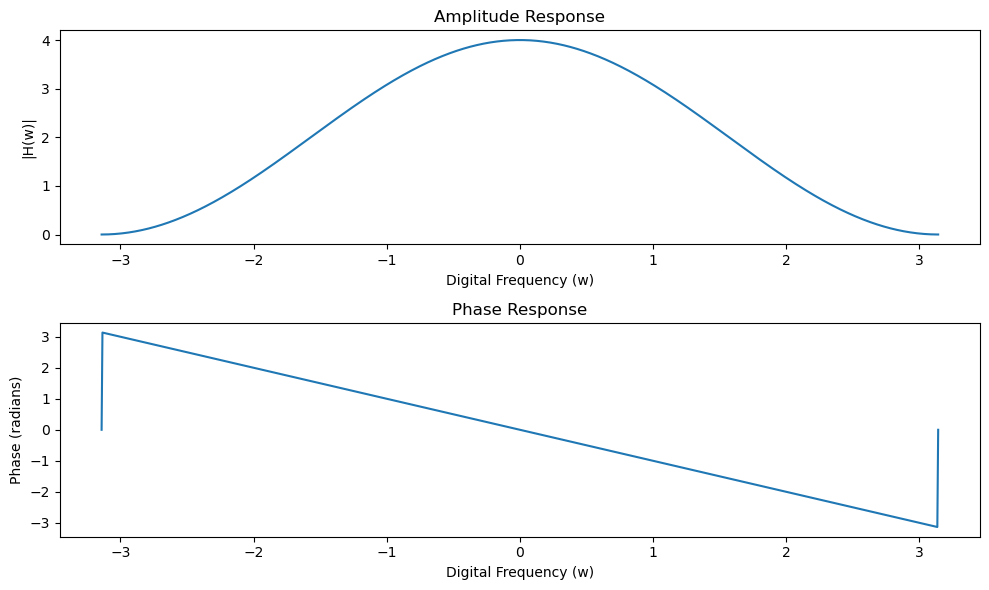

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

bk = [1, 2, 1]

omega = np.linspace(-np.pi, np.pi, 1000)

H = bk[0] + bk[1] * np.exp(-1j * omega) + bk[2] * np.exp(-2j * omega)

magnitude = np.abs(H)

phase = np.angle(H)

plt.figure(figsize=(10, 6))

#頻率
plt.subplot(2, 1, 1)
plt.plot(omega, magnitude)
plt.title('Amplitude Response')
plt.xlabel('Digital Frequency (w)')
plt.ylabel('|H(w)|')

#相位
plt.subplot(2, 1, 2)
plt.plot(omega, phase)
plt.title('Phase Response')
plt.xlabel('Digital Frequency (w)')
plt.ylabel('Phase (radians)')

plt.tight_layout()
plt.show()

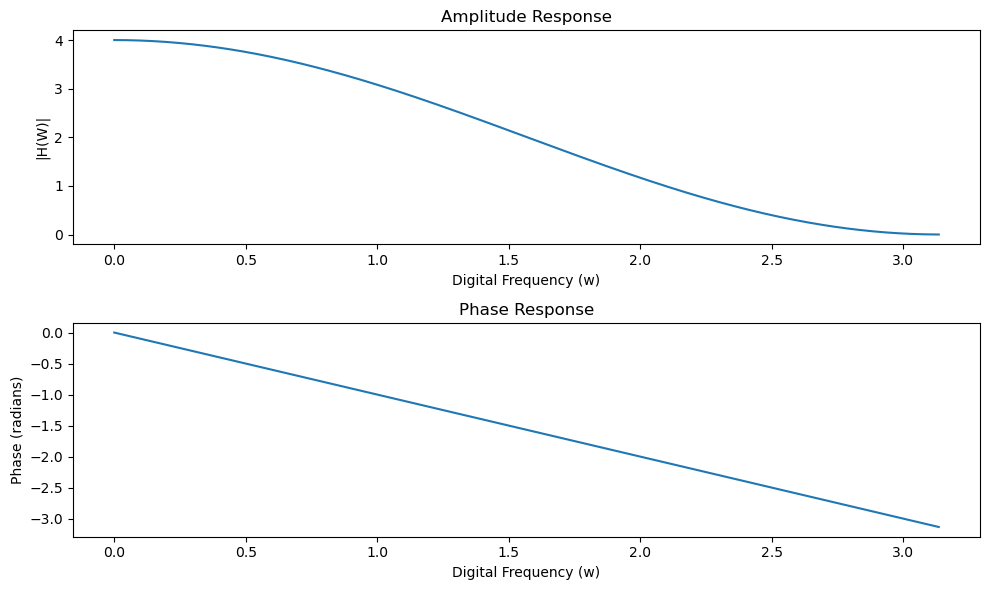

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

bk = [1, 2, 1]

w, h = signal.freqz(bk)

magnitude = np.abs(h)
phase = np.angle(h)

plt.figure(figsize=(10, 6))

#頻率
plt.subplot(2, 1, 1)
plt.plot(w, magnitude)
plt.title('Amplitude Response')
plt.xlabel('Digital Frequency (w)')
plt.ylabel('|H(W)|')

#相位
plt.subplot(2, 1, 2)
plt.plot(w, phase)
plt.title('Phase Response')
plt.xlabel('Digital Frequency (w)')
plt.ylabel('Phase (radians)')

plt.tight_layout()
plt.show()


## 實驗十六
### Z-transform 零點與極點
### 執行以下程式並觀察

Text(0,0.5,'Imag')

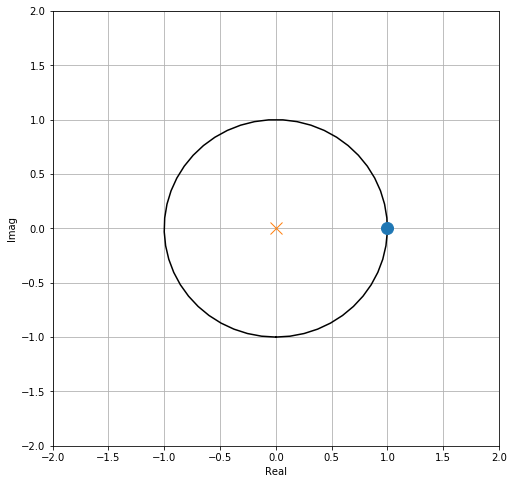

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

angle = np.linspace(-np.pi, np.pi, 50)
cirx = np.sin(angle)
ciry = np.cos(angle)
z = 1
plt.figure(figsize=(8,8))
plt.plot(cirx, ciry,'k-')
plt.plot(np.real(z), np.imag(z), 'o', markersize=12)
plt.plot(0, 0, 'x', markersize=12)
plt.grid()

plt.xlim((-2, 2))
plt.xlabel('Real')
plt.ylim((-2, 2))
plt.ylabel('Imag')


####  問題十六
### (1) 利用 np.roots 找方程式的根，繪製 H(z) = Z - 1 之零點及極點
### (2) 利用 np.roots 找方程式的根，繪製 H(z) = 1 -2 Z<sup>-1</sup> + 2Z<sup>-2</sup> - Z<sup>-3</sup> 之零點及極點
### (3) 繪製 H(z) = Z - e<sup>-j$\hat\omega$</sup>  之零點及極點
### (4) 設計一即時FIR系統，使得該系統能完整濾除  $\hat\omega = \frac{\pi}{7} $ , $\hat\omega = \frac{\pi}{8} $  , $\hat\omega = \frac{\pi}{9} $ 之數位信號，繪製其pole zero plot

Text(0, 0.5, 'Imag')

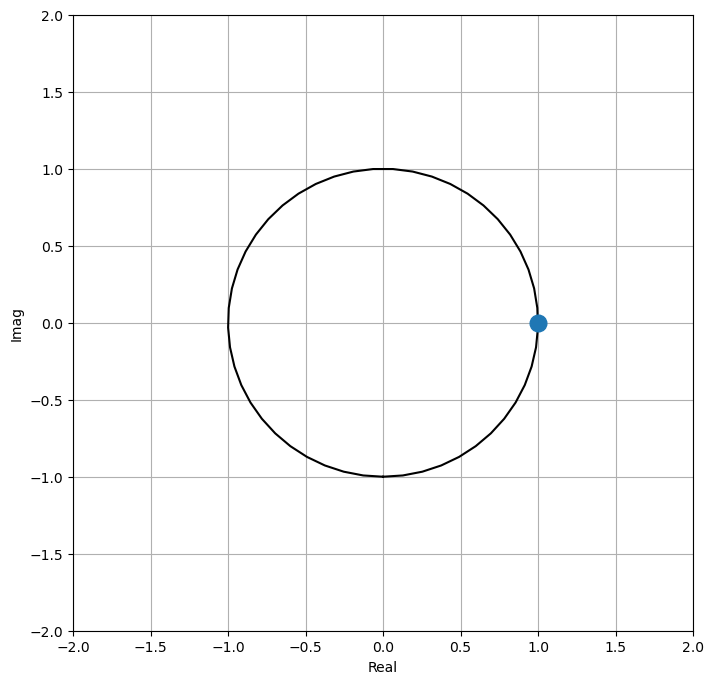

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

angle = np.linspace(-np.pi, np.pi, 50)
cirx = np.sin(angle)
ciry = np.cos(angle)
z = np.roots([1,-1])
plt.figure(figsize=(8,8))
plt.plot(cirx, ciry,'k-')
plt.plot(np.real(z), np.imag(z), 'o', markersize=12)

plt.grid()

plt.xlim((-2, 2))
plt.xlabel('Real')
plt.ylim((-2, 2))
plt.ylabel('Imag')


Text(0, 0.5, 'Imag')

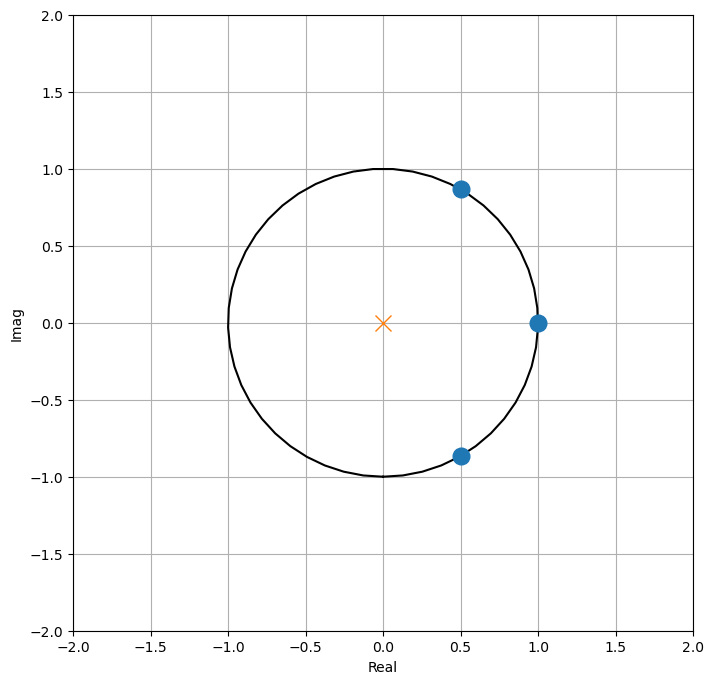

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

angle = np.linspace(-np.pi, np.pi, 50)
cirx = np.sin(angle)
ciry = np.cos(angle)
z = np.roots([0,1,-2,2,-1])
plt.figure(figsize=(8,8))
plt.plot(cirx, ciry,'k-')
plt.plot(np.real(z), np.imag(z), 'o', markersize=12)
plt.plot(0, 0, 'x', markersize=12)
plt.grid()

plt.xlim((-2, 2))
plt.xlabel('Real')
plt.ylim((-2, 2))
plt.ylabel('Imag')

Text(0, 0.5, 'Imag')

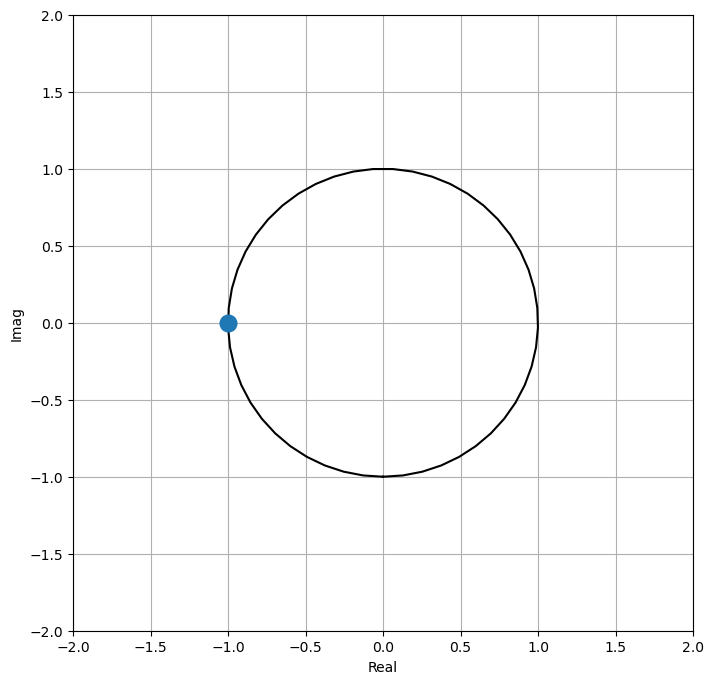

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

angle = np.linspace(-np.pi, np.pi, 50)
cirx = np.sin(angle)
ciry = np.cos(angle)


z = np.exp(-1j * np.pi)

plt.figure(figsize=(8,8))
plt.plot(cirx, ciry,'k-')
plt.plot(np.real(z), np.imag(z), 'o', markersize=12)

plt.grid()

plt.xlim((-2, 2))
plt.xlabel('Real')
plt.ylim((-2, 2))
plt.ylabel('Imag')

Text(0, 0.5, 'Imag')

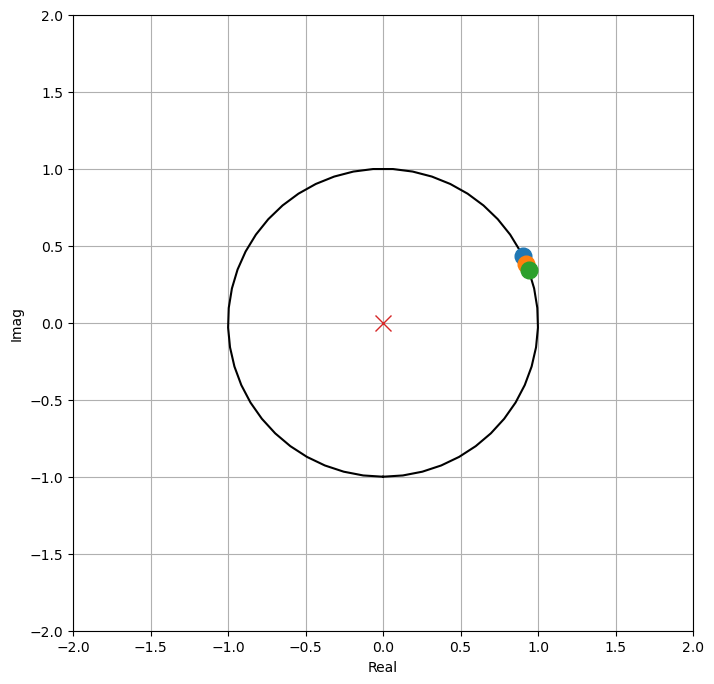

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

fs = 1.0  # 頻率
frequencies = [np.pi/7, np.pi/8, np.pi/9]  

# Zero
x = np.exp(1j * np.pi/7)
y = np.exp(1j * np.pi/8)
z = np.exp(1j * np.pi/9)

# FIR
system = signal.ZerosPolesGain(x, [], 1)
system = signal.ZerosPolesGain(y, [], 1)
system = signal.ZerosPolesGain(z, [], 1)

plt.figure(figsize=(8,8))
plt.plot(cirx, ciry,'k-')
plt.plot(np.real(x), np.imag(x), 'o', markersize=12)
plt.plot(np.real(y), np.imag(y), 'o', markersize=12)
plt.plot(np.real(z), np.imag(z), 'o', markersize=12)
plt.plot(0, 0, 'x', markersize=12)
plt.grid()

plt.xlim((-2, 2))
plt.xlabel('Real')
plt.ylim((-2, 2))
plt.ylabel('Imag')